In [1]:
# # ONLY RUN THIS IF YOU'RE IN GOOGLE COLAB
# from google.colab import drive
# import os

# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Thesis/Pintu-Air')

# # Verify you're in the right place
# !pwd
# !ls -la

In [2]:
# Import libraries and functions
%run LibrariesFunctions.py
from LibrariesFunctions import *

# Import Data

In [3]:
data_x_train, data_x_test, data_y_train, data_y_test = read_data('Manggarai')

Full Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31224 entries, 2021-10-16 00:00:00 to 2025-05-08 23:00:00
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Raw                31196 non-null  float64
 1   ID_Cleaned            31224 non-null  int64  
 2   Katulampa (air)       31224 non-null  float64
 3   Katulampa (cuaca)     31224 non-null  object 
 4   Depok (air)           31224 non-null  float64
 5   Depok (cuaca)         31224 non-null  object 
 6   Manggarai (air)       31224 non-null  float64
 7   Manggarai (cuaca)     31224 non-null  object 
 8   Karet (air)           31224 non-null  float64
 9   Karet (cuaca)         31224 non-null  object 
 10  Krukut (air)          31224 non-null  float64
 11  Krukut (cuaca)        31224 non-null  object 
 12  Pesanggrahan (air)    31224 non-null  float64
 13  Pesanggrahan (cuaca)  31224 non-null  object 
 14  Angke (ai

In [4]:
data_y_train

Tanggal
2021-10-16 00:00:00    555.0
2021-10-16 01:00:00    555.0
2021-10-16 02:00:00    555.0
2021-10-16 03:00:00    555.0
2021-10-16 04:00:00    560.0
                       ...  
2025-03-04 17:00:00    850.0
2025-03-04 18:00:00    845.0
2025-03-04 19:00:00    835.0
2025-03-04 20:00:00    830.0
2025-03-04 21:00:00    825.0
Name: Manggarai (air), Length: 29662, dtype: float64

# EDA

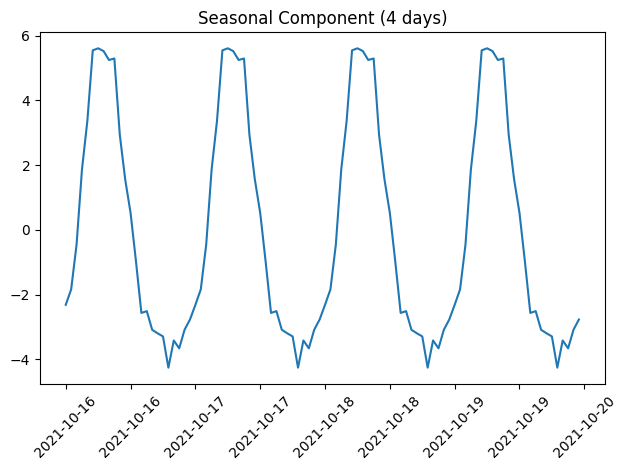

In [6]:
period = 24

decomposition = seasonal_decompose(
    data_y_train,
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

# Uji Stasioneritas

## Uji Stasioneritas terhadap Varians

$$
\begin{aligned}
H_0&: \lambda=1 \text{(Stasioner terhadap varians)}\\H_1&: \lambda\ne1\\
\end{aligned}
$$

In [6]:
lambda_opt = boxcox_transformation(data_y_train)

Lambda optimal: 1.3867
LRT statistic: 392.5892
P-value: 0.000000


In [7]:
print(f"{lambda_opt:.50f}")

1.38669545927877613245016164000844582915306091308594


Karena P-Value LR test lambda(1) = 0.000000 < 0.05, maka tolak H0, maka data tidak stasioner terhadap varians, sehingga perlu dilakukan transformasi sesuai dengan lambda optimal

In [8]:
data_y_train_pow = data_y_train ** lambda_opt
boxcox_transformation(data_y_train_pow)

Lambda optimal: 1.0000
LRT statistic: 0.0000
P-value: 0.999994


np.float64(1.0000002308565767)

## Uji Stasioneritas terhadap Mean

$$
\begin{aligned}
H_0&: \text{Data tidak stasioner terhadap mean}\\
H_1&: \text{Data stasioner terhadap mean}\\
\end{aligned}
$$

In [9]:
result = adfuller(data_y_train_pow)

# Hasil ADF test
print(f"ADF Statistic : {result[0]}")
print(f"p-value       : {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

ADF Statistic : -8.929164271833162
p-value       : 9.922751729042287e-15
Critical Values:
   1% : -3.4305708146287484
   5% : -2.861637594050852
   10% : -2.56682194634312


Karena p-value 9.922758e-15 =  < 0.05, maka tolak H0, sehingga kita memiliki cukup bukti untuk menyimpulkan bahwa data stasioner terhadap mean

# ACF PACF

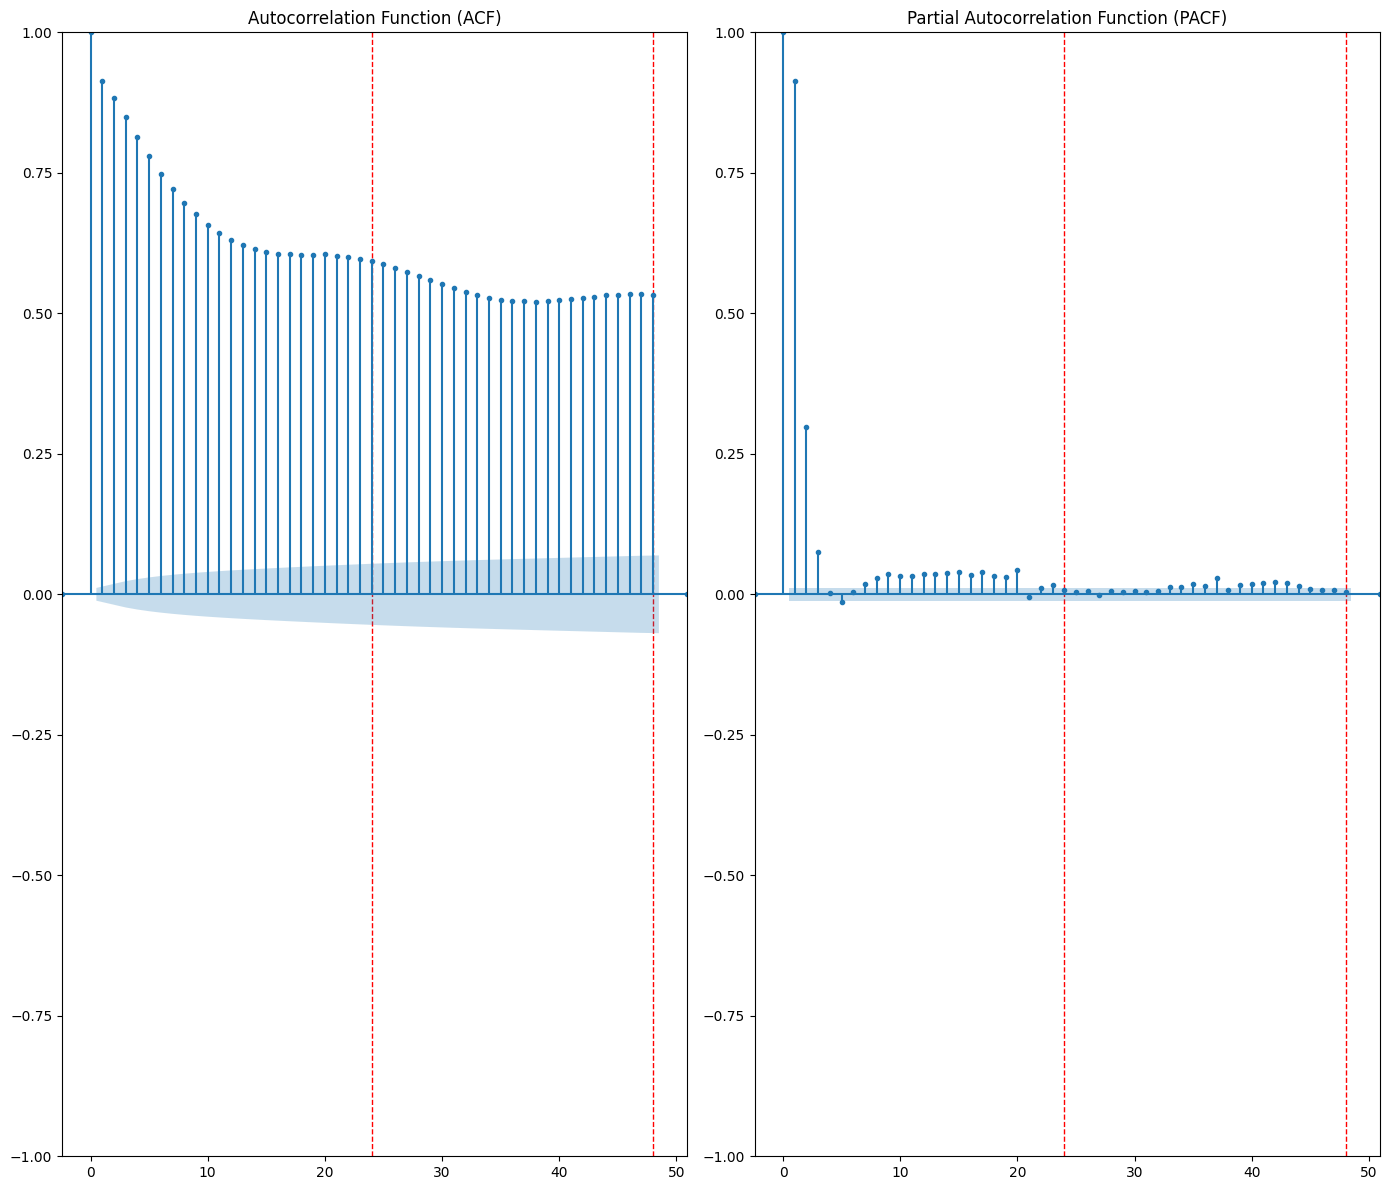

In [10]:
plot_acf_pacf(data_y_train_pow, period, 48)

# Modelling

In [11]:
# ARIMA model based on ACF PACF (q: dies down; p: cut off at lag-3)
ar_configs = [
    {'name': 'ARIMA(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,0)', 'model_type': 'ARIMA', 'order': (2,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,0)', 'model_type': 'ARIMA', 'order': (3,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,0)', 'model_type': 'ARIMA', 'order': (4,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,0)', 'model_type': 'ARIMA', 'order': (5,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,0)', 'model_type': 'ARIMA', 'order': (6,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(7,0,0)', 'model_type': 'ARIMA', 'order': (7,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(8,0,0)', 'model_type': 'ARIMA', 'order': (8,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,0)', 'model_type': 'ARIMA', 'order': (9,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(10,0,0)', 'model_type': 'ARIMA', 'order': (10,0,0), 'seasonal_order': None, 'exog': False},
]
ar_comparison = modelling (ar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ar_comparison


Testing ARIMA(1,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -211985.459
Date:                Wed, 28 May 2025   AIC                         423976.917
Time:                        10:47:01   BIC                         424001.810
Sample:                    10-16-2021   HQIC                        423984.909
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9310     30.184    250.392      0.000    7498.771    7617.091
ar.L1          0.9133      0.001   1052.321      0.000       0.91

Nama Dataset          Model Semua Variabel Signifikan P-value Ljung Box  \
0  Manggarai (air)   ARIMA(1,0,0)                        Ya          0.000000   
1  Manggarai (air)   ARIMA(2,0,0)                        Ya          0.000000   
2  Manggarai (air)   ARIMA(3,0,0)                        Ya          0.000000   
3  Manggarai (air)   ARIMA(4,0,0)                     Tidak          0.000000   
4  Manggarai (air)   ARIMA(5,0,0)                     Tidak          0.000000   
5  Manggarai (air)   ARIMA(6,0,0)                     Tidak          0.000000   
6  Manggarai (air)   ARIMA(7,0,0)                     Tidak          0.000000   
7  Manggarai (air)   ARIMA(8,0,0)                     Tidak          0.000000   
8  Manggarai (air)   ARIMA(9,0,0)                     Tidak          0.000000   
9  Manggarai (air)  ARIMA(10,0,0)                     Tidak          0.000000   

  White Noise? P-value Lillie Test Distribusi Normal? RMSE Training  \
0        Tidak            0.001000              Tidak       21.4668   
1        Tidak            0.001000              Tidak       19.8556   
2        Tidak            0.001000              Tidak       19.7526   
3        Tidak            0.001000              Tidak       19.7515   
4        Tidak            0.001000              Tidak       19.7512   
5        Tidak            0.001000              Tidak       19.7511   
6        Tidak            0.001000              Tidak       19.7487   
7        Tidak            0.001000              Tidak       19.7414   
8        Tidak            0.001000              Tidak       19.7293   
9        Tidak            0.001000              Tidak       19.7197   

  RMSE Testing  
0      40.7089  
1      40.3410  
2      40.2858  
3      40.2836  
4      40.2918  
5      40.2889  
6      40.2744  
7      40.2510  
8      40.2251  
9      40.2040

In [12]:
# Try MA models
ma_configs = [
    {'name': 'ARIMA(0,0,1)', 'model_type': 'ARIMA', 'order': (0,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,2)', 'model_type': 'ARIMA', 'order': (0,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,3)', 'model_type': 'ARIMA', 'order': (0,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,4)', 'model_type': 'ARIMA', 'order': (0,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,5)', 'model_type': 'ARIMA', 'order': (0,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,6)', 'model_type': 'ARIMA', 'order': (0,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,7)', 'model_type': 'ARIMA', 'order': (0,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,8)', 'model_type': 'ARIMA', 'order': (0,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,9)', 'model_type': 'ARIMA', 'order': (0,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,10)', 'model_type': 'ARIMA', 'order': (0,0,10), 'seasonal_order': None, 'exog': False},
]
ma_comparison = modelling (ma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma_comparison


Testing ARIMA(0,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -227334.312
Date:                Wed, 28 May 2025   AIC                         454674.623
Time:                        10:49:22   BIC                         454699.516
Sample:                    10-16-2021   HQIC                        454682.614
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9375      5.111   1478.744      0.000    7547.920    7567.955
ma.L1          0.6939      0.001    624.292      0.000       0.69

Nama Dataset          Model Semua Variabel Signifikan P-value Ljung Box  \
0  Manggarai (air)   ARIMA(0,0,1)                        Ya          0.000000   
1  Manggarai (air)   ARIMA(0,0,2)                        Ya          0.000000   
2  Manggarai (air)   ARIMA(0,0,3)                        Ya          0.000000   
3  Manggarai (air)   ARIMA(0,0,4)                        Ya          0.000000   
4  Manggarai (air)   ARIMA(0,0,5)                        Ya          0.000000   
5  Manggarai (air)   ARIMA(0,0,6)                        Ya          0.000000   
6  Manggarai (air)   ARIMA(0,0,7)                        Ya          0.000000   
7  Manggarai (air)   ARIMA(0,0,8)                        Ya          0.000000   
8  Manggarai (air)   ARIMA(0,0,9)                        Ya          0.000000   
9  Manggarai (air)  ARIMA(0,0,10)                        Ya          0.000000   

  White Noise? P-value Lillie Test Distribusi Normal? RMSE Training  \
0        Tidak            0.001000              Tidak       31.9612   
1        Tidak            0.001000              Tidak       27.3017   
2        Tidak            0.001000              Tidak       24.9531   
3        Tidak            0.001000              Tidak       23.4915   
4        Tidak            0.001000              Tidak       22.5255   
5        Tidak            0.001000              Tidak       21.8819   
6        Tidak            0.001000              Tidak       21.4373   
7        Tidak            0.001000              Tidak       21.1194   
8        Tidak            0.001000              Tidak       20.8919   
9        Tidak            0.001000              Tidak       20.7075   

  RMSE Testing  
0      42.5656  
1      42.4171  
2      42.2806  
3      42.1536  
4      42.0283  
5      41.9327  
6      41.8236  
7      41.7449  
8      41.6753  
9      41.6008

In [13]:
# Try MA models
ma2_configs = [
    {'name': 'ARIMA(0,0,11)', 'model_type': 'ARIMA', 'order': (0,0,11), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,12)', 'model_type': 'ARIMA', 'order': (0,0,12), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,13)', 'model_type': 'ARIMA', 'order': (0,0,13), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,14)', 'model_type': 'ARIMA', 'order': (0,0,14), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,15)', 'model_type': 'ARIMA', 'order': (0,0,15), 'seasonal_order': None, 'exog': False}
]
ma2_comparison = modelling (ma2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma2_comparison


Testing ARIMA(0,0,11)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                ARIMA(0, 0, 11)   Log Likelihood             -211786.405
Date:                Wed, 28 May 2025   AIC                         423598.810
Time:                        11:02:49   BIC                         423706.679
Sample:                    10-16-2021   HQIC                        423633.439
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9355     15.409    490.487      0.000    7527.734    7588.137
ma.L1          0.6832      0.001    802.100      0.000       0.6

Nama Dataset          Model Semua Variabel Signifikan P-value Ljung Box  \
0  Manggarai (air)  ARIMA(0,0,11)                        Ya          0.000000   
1  Manggarai (air)  ARIMA(0,0,12)                        Ya          0.000000   
2  Manggarai (air)  ARIMA(0,0,13)                        Ya          0.000000   
3  Manggarai (air)  ARIMA(0,0,14)                        Ya          0.000000   
4  Manggarai (air)  ARIMA(0,0,15)                        Ya          0.000000   

  White Noise? P-value Lillie Test Distribusi Normal? RMSE Training  \
0        Tidak            0.001000              Tidak       20.5692   
1        Tidak            0.001000              Tidak       20.4521   
2        Tidak            0.001000              Tidak       20.3583   
3        Tidak            0.001000              Tidak       20.2810   
4        Tidak            0.001000              Tidak       20.2094   

  RMSE Testing  
0      41.5379  
1      41.4726  
2      41.4187  
3      41.3670  
4      41.3211

In [15]:
# Try MA models
ma3_configs = [
    {'name': 'ARIMA(0,0,16)', 'model_type': 'ARIMA', 'order': (0,0,16), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,17)', 'model_type': 'ARIMA', 'order': (0,0,17), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,18)', 'model_type': 'ARIMA', 'order': (0,0,18), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,19)', 'model_type': 'ARIMA', 'order': (0,0,19), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,20)', 'model_type': 'ARIMA', 'order': (0,0,20), 'seasonal_order': None, 'exog': False},
]
ma3_comparison = modelling (ma3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma3_comparison


Testing ARIMA(0,0,16)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:        Manggarai (air)   No. Observations:                29662
Model:                ARIMA(0, 0, 16)   Log Likelihood             -211142.733
Date:                Wed, 28 May 2025   AIC                         422321.466
Time:                        11:17:40   BIC                         422470.824
Sample:                    10-16-2021   HQIC                        422369.415
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7557.9347     18.906    399.766      0.000    7520.880    7594.990
ma.L1          0.6527      0.001    772.664      0.000       0.6

Nama Dataset          Model Semua Variabel Signifikan P-value Ljung Box  \
0  Manggarai (air)  ARIMA(0,0,16)                        Ya          0.000000   
1  Manggarai (air)  ARIMA(0,0,17)                        Ya          0.000000   
2  Manggarai (air)  ARIMA(0,0,18)                        Ya          0.000000   
3  Manggarai (air)  ARIMA(0,0,19)                        Ya          0.000000   
4  Manggarai (air)  ARIMA(0,0,20)                        Ya          0.000000   

  White Noise? P-value Lillie Test Distribusi Normal? RMSE Training  \
0        Tidak            0.001000              Tidak       20.1605   
1        Tidak            0.001000              Tidak       20.1185   
2        Tidak            0.001000              Tidak       20.0978   
3        Tidak            0.001000              Tidak       20.0919   
4        Tidak            0.001000              Tidak       20.0408   

  RMSE Testing  
0      41.2887  
1      41.2577  
2      41.2278  
3      41.2053  
4      41.1464

In [16]:
compare = pd.concat([ar_comparison,
                     ma_comparison,
                     ma2_comparison,
                     ma3_comparison
                     ])
compare.to_csv(f'model_comparison_{data_y_train.name}_results.csv')

In [11]:
compare = pd.read_csv(f'model_comparison_{data_y_train.name}_results.csv', index_col=0)
compare

Nama Dataset          Model Semua Variabel Signifikan  \
0  Manggarai (air)   ARIMA(1,0,0)                        Ya   
1  Manggarai (air)   ARIMA(2,0,0)                        Ya   
2  Manggarai (air)   ARIMA(3,0,0)                        Ya   
3  Manggarai (air)   ARIMA(4,0,0)                     Tidak   
4  Manggarai (air)   ARIMA(5,0,0)                     Tidak   
5  Manggarai (air)   ARIMA(6,0,0)                     Tidak   
6  Manggarai (air)   ARIMA(7,0,0)                     Tidak   
7  Manggarai (air)   ARIMA(8,0,0)                     Tidak   
8  Manggarai (air)   ARIMA(9,0,0)                     Tidak   
9  Manggarai (air)  ARIMA(10,0,0)                     Tidak   
0  Manggarai (air)   ARIMA(0,0,1)                        Ya   
1  Manggarai (air)   ARIMA(0,0,2)                        Ya   
2  Manggarai (air)   ARIMA(0,0,3)                        Ya   
3  Manggarai (air)   ARIMA(0,0,4)                        Ya   
4  Manggarai (air)   ARIMA(0,0,5)                        Ya   
5  Manggarai (air)   ARIMA(0,0,6)                        Ya   
6  Manggarai (air)   ARIMA(0,0,7)                        Ya   
7  Manggarai (air)   ARIMA(0,0,8)                        Ya   
8  Manggarai (air)   ARIMA(0,0,9)                        Ya   
9  Manggarai (air)  ARIMA(0,0,10)                        Ya   
0  Manggarai (air)  ARIMA(0,0,11)                        Ya   
1  Manggarai (air)  ARIMA(0,0,12)                        Ya   
2  Manggarai (air)  ARIMA(0,0,13)                        Ya   
3  Manggarai (air)  ARIMA(0,0,14)                        Ya   
4  Manggarai (air)  ARIMA(0,0,15)                        Ya   
0  Manggarai (air)  ARIMA(0,0,16)                        Ya   
1  Manggarai (air)  ARIMA(0,0,17)                        Ya   
2  Manggarai (air)  ARIMA(0,0,18)                        Ya   
3  Manggarai (air)  ARIMA(0,0,19)                        Ya   
4  Manggarai (air)  ARIMA(0,0,20)                        Ya   

   P-value Ljung Box White Noise?  P-value Lillie Test Distribusi Normal?  \
0                0.0        Tidak                0.001              Tidak   
1                0.0        Tidak                0.001              Tidak   
2                0.0        Tidak                0.001              Tidak   
3                0.0        Tidak                0.001              Tidak   
4                0.0        Tidak                0.001              Tidak   
5                0.0        Tidak                0.001              Tidak   
6                0.0        Tidak                0.001              Tidak   
7                0.0        Tidak                0.001              Tidak   
8                0.0        Tidak                0.001              Tidak   
9                0.0        Tidak                0.001              Tidak   
0                0.0        Tidak                0.001              Tidak   
1                0.0        Tidak                0.001              Tidak   
2                0.0        Tidak                0.001              Tidak   
3                0.0        Tidak                0.001              Tidak   
4                0.0        Tidak                0.001              Tidak   
5                0.0        Tidak                0.001              Tidak   
6                0.0        Tidak                0.001              Tidak   
7                0.0        Tidak                0.001              Tidak   
8                0.0        Tidak                0.001              Tidak   
9                0.0        Tidak                0.001              Tidak   
0                0.0        Tidak                0.001              Tidak   
1                0.0        Tidak                0.001              Tidak   
2                0.0        Tidak                0.001              Tidak   
3                0.0        Tidak                0.001              Tidak   
4                0.0        Tidak                0.001              Tidak   
0                0.0        Tidak                0

In [12]:
# SARIMA
sar_configs = [
    {'name': 'SARIMA(1,0,0)x(1,0,0,24)', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': (1,0,0,24), 'exog': False},
    {'name': 'SARIMA(2,0,0)x(1,0,0,24)', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': (1,0,0,24), 'exog': False},
    {'name': 'SARIMA(3,0,0)x(1,0,0,24)', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': (1,0,0,24), 'exog': False},
    {'name': 'SARIMA(4,0,0)x(1,0,0,24)', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': (1,0,0,24), 'exog': False},
    {'name': 'SARIMA(5,0,0)x(1,0,0,24)', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': (1,0,0,24), 'exog': False},
]
sar_comparison = modelling (sar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sar_comparison


Testing SARIMA(1,0,0)x(1,0,0,24)
Fitting model...
Error fitting SARIMA(1,0,0)x(1,0,0,24): LU decomposition error.
Error cleanup: 0 objects collected

Testing SARIMA(2,0,0)x(1,0,0,24)
Fitting model...


: 